# Assignment2
Nima Jahanbazfard

## Fashion MNIST Dataset

### Imports

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy
from torch.optim.lr_scheduler import StepLR


### Data Preparation

In [2]:
trainData = datasets.FashionMNIST("./",train=True, download=True,transform=ToTensor())
testData = datasets.FashionMNIST("./",train=False, download=True,transform=ToTensor())

In [3]:
testLoader = DataLoader(dataset=testData,batch_size = 32, shuffle = False)
trainLoader = DataLoader(dataset=trainData,batch_size = 32, shuffle = True)

In [4]:
for images,targets in trainLoader:
  print(images.size())

torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 28, 28])
torch.Size([32, 1, 2

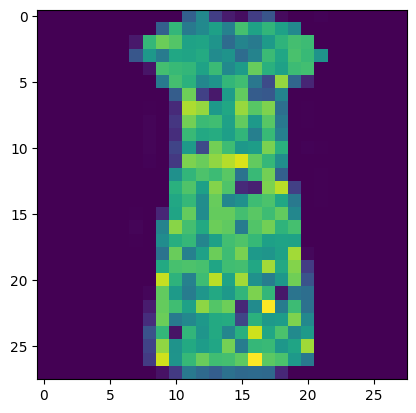

In [5]:

plt.imshow(images[1,0,:,:])

### Model Architecture

In [63]:
class SimpleNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28*28, 20),
      nn.ReLU(),
      nn.Linear(20, 20),
      nn.ReLU(),
      nn.Linear(20,10)
    )

  def forward(self,x):
    return self.layers(x)

### Training

In [64]:
def train(data_loader,model,Loss,optimizer):
  num_batch = len(data_loader)
  total_loss = 0
  for images,targets in data_loader:
      output = model(images)
      L = Loss(output,targets)
      total_loss += L
      L.backward()
      optimizer.step()
      optimizer.zero_grad()

  total_loss = total_loss/num_batch
  print(f'Average Loss: {total_loss}')

In [65]:
def correct (output,target):
  prediction = output.argmax(1)
  return (prediction == target).type(torch.float).sum()


### Evaluation

In [66]:
def test(test_loader, model,Loss):
  num_batch = len(test_loader)
  num_images = len(test_loader.dataset)

  total_loss = 0
  total_correct = 0
  for images,targets in test_loader:
      output = model(images)
      L = Loss(output,targets)
      total_loss += L
      total_correct += correct(output,targets)

  total_loss = total_loss/num_batch
  accuracy = total_correct/ num_images

  print(f'Totall Correct: {total_correct}')
  print(f'Average Loss: {total_loss}')
  print(f'Accuracy: {accuracy}')
  

  

### Hyperparameter Tuning and Visualization

In [67]:
model = SimpleNN()
Loss = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr =0.1,momentum=0.5)

epochs = 20
for epoch in range(epochs):
  print("training epoch = ",epoch)
  train(trainLoader,model,Loss,optimizer)
  print('train accuracy:')
  test(trainLoader,model,Loss)
  print('test accuracy:')
  test(testLoader,model,Loss)

training epoch =  0
Average Loss: 0.5997258424758911
train accuracy:
Totall Correct: 50682.0
Average Loss: 0.4244793951511383
Accuracy: 0.8446999788284302
test accuracy:
Totall Correct: 8345.0
Average Loss: 0.4649450182914734
Accuracy: 0.8345000147819519
training epoch =  1
Average Loss: 0.44257935881614685
train accuracy:
Totall Correct: 50771.0
Average Loss: 0.4093817174434662
Accuracy: 0.8461833596229553
test accuracy:
Totall Correct: 8307.0
Average Loss: 0.4558548629283905
Accuracy: 0.8306999802589417
training epoch =  2
Average Loss: 0.4050273001194
train accuracy:
Totall Correct: 50728.0
Average Loss: 0.41279876232147217
Accuracy: 0.845466673374176
test accuracy:
Totall Correct: 8258.0
Average Loss: 0.47019344568252563
Accuracy: 0.8258000016212463
training epoch =  3
Average Loss: 0.38679999113082886
train accuracy:
Totall Correct: 51750.0
Average Loss: 0.3734918534755707
Accuracy: 0.862500011920929
test accuracy:
Totall Correct: 8462.0
Average Loss: 0.4299199879169464
Accuracy: 

KeyboardInterrupt: 